<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/BERT_for_article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> BERT-for-article-Classification</h2>




In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [ ]:
!pip install -q tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 47 kB/s 
     |████████████████████████████████| 20.1 MB 140 kB/s 
     |████████████████████████████████| 459 kB 82.9 MB/s 
     |████████████████████████████████| 2.9 MB 55.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 7.17 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 7.6 MB 10.6 MB/s 
     |████████████████████████████████| 202 kB 72.4 MB/s 
     |████████████████████████████████| 15.7 MB 190 kB/s 
     |████████████████████████████████| 11.3 MB 65.4 MB/s 
     |████████████████████████████████| 296 kB 58.6 MB/s 
     |████████████████████████████████| 99 kB 7.4 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
     |████████████████████████████████| 213 kB 78.1 MB/s 
     |████████████████████████████████| 4.0 MB 61.6 MB/s 
     |████████████████████████████████| 1.1 MB 84.6 MB/s 
     |████████████████████████████████| 352 kB 63.3 MB/s 
     |████████████████████████████████| 1.2 MB 58.1 MB/s 
     |████████████████████████████████| 10.3 MB 45.9 MB/s 
     |████████████████████████████████| 37.1 MB 50 kB/s 
     |████████████████████████████████| 596 kB 76.2 MB/s 
     |████████████████████████████████| 3.1 MB 56.7 MB/s 
     |████████████████████████████████| 95 kB 3.2 MB/s 
     |████████████

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.4.0 and strictly below 2.7.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#df = pd.read_excel("/content/drive/MyDrive/press/article_ar_excel.xlsx")
df = pd.read_csv('/content/drive/MyDrive/press/article_clean.csv')
df.shape

(1282, 4)

In [ ]:
df.tail()

<AxesSubplot:title={'center':'distribution'}, ylabel='Frequency'>

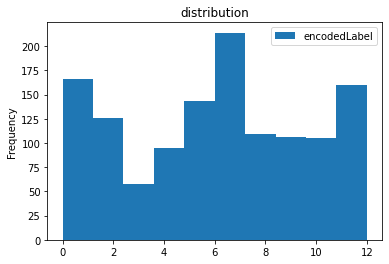

In [ ]:
df.plot(kind='hist', title='distribution')

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
df_train, df_test = train_test_split(df, random_state=20, train_size=0.8, shuffle=True)

In [ ]:
df_train.shape, df_test.shape

((1025, 4), (257, 4))

In [ ]:
with tf.device('/cpu:0'):
  data = tf.data.Dataset.from_tensor_slices((df['Article_cleaned'].values, df['encodedLabel'].values))

  for text, label in data.take(1):
    print(text)
    print(label)

tf.Tensor(b'\xd8\xa3\xd8\xa8\xd9\x88\xd8\xb8\xd8\xa8\xd9\x8a \xd8\xa5\xd9\x8a\xd9\x85\xd8\xa7\xd9\x86 \xd8\xb3\xd8\xb1\xd9\x88\xd8\xb1 \xd9\x8a\xd8\xb4\xd9\x83\xd9\x84   \xd8\xa7\xd9\x84\xd9\x85\xd8\xb1\xd8\xad\xd9\x88\xd9\x85 \xd8\xb9\xd8\xa8\xd8\xaf\xd8\xa7\xd9\x84\xd8\xac\xd9\x84\xd9\x8a\xd9\x84 \xd8\xa7\xd9\x84\xd9\x81\xd9\x87\xd9\x8a\xd9\x85 \xd9\x88\xd8\xb9\xd8\xa7\xd8\xa6\xd9\x84\xd8\xaa\xd9\x87   \xd9\x88\xd8\xa7\xd8\xad\xd8\xaf\xd8\xa7 \xd8\xa7\xd9\x84\xd9\x85\xd8\xb4\xd8\xb1\xd9\x88\xd8\xb9\xd8\xa7\xd8\xaa \xd8\xa7\xd9\x84\xd9\x85\xd9\x85\xd9\x8a\xd8\xb2\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xb9\xd9\x85\xd9\x84 \xd8\xa7\xd9\x84\xd8\xae\xd9\x8a\xd8\xb1\xd9\x8a \xd9\x88\xd9\x8a\xd8\xb2\xd9\x8a\xd8\xaf \xd8\xa3\xd8\xb1\xd8\xb6 \xd8\xaf\xd9\x88\xd9\x84\xd8\xa9 \xd8\xa7\xd9\x84\xd8\xa5\xd9\x85\xd8\xa7\xd8\xb1\xd8\xa7\xd8\xaa \xd8\xaa\xd9\x86\xd8\xa7\xd8\xb2\xd9\x84 \xd8\xa3\xd8\xa8\xd9\x86\xd8\xa7\xd8\xa1 \xd8\xa7\xd9\x84\xd9\x85\xd8\xb1\xd8\xad\xd9\x88\xd9\x85 \xd8\xb9\xd8\xa8\xd8\xaf\xd8

## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
!git clone https://github.com/aub-mind/arabert.git
!pip install pyarabic
!pip install farasapy
!pip install transformers

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""
from arabert.preprocess import ArabertPreprocessor
# Label categories
T_list = sorted(df['encodedLabel'].drop_duplicates())
label_list = [T_list]
max_seq_length = 512 # maximum length of (token) input sequences
train_bash_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
# arabert : https://tfhub.dev/callmemehdi/AraBERT/1
#universal-sentence-encoder-multilingual-large : https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3
"""
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

vocab_file = vocab_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)
"""

[2021-10-15 23:36:13,103 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


''

In [ ]:
from transformers import  AutoModel,AutoTokenizer
import torch

#load your pre_trained model with all its weights 
model_name= 'aubmindlab/bert-base-arabert' 
tokenizer = AutoTokenizer.from_pretrained(model_name) #aubmindlab/bert-base-arabertv2
model=AutoModel.from_pretrained(model_name)
example = 'اللهم صلي و سلم و بارك علي نبينا و قدوتنا و سائر الأنبياء و المرسلين'
#tokenizer.tokenize(example)
inputs = tokenizer.encode_plus(example,return_tensors='pt')
inputs
outputs = model(inputs['input_ids'],inputs['attention_mask'],inputs['token_type_ids'],output_hidden_states=True)
outputs
######################################
text = text[:512]

model_name= 'aubmindlab/bert-base-arabert' 
tokenizer = AutoTokenizer.from_pretrained(model_name)
text_preprocessed = tokenizer.tokenize(text)
#text_preprocessed = ArabertPreprocessor(text)
arabert_input = arabert_tokenizer.encode(text_preprocessed,add_special_tokens=True)
tensor_input_ids = torch.tensor(arabert_input).unsqueeze(0)
output = arabert_model(tensor_input_ids) #input_ids
print('Converted')
output = output [0][0][1:-1]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  
  example = classifier_data_lib.InputExample(guid=None, text_a = text.numpy(), text_b = None, label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)
  

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {'input_word_ids': input_ids,
       'input_mask': input_mask,
       'input_type_ids': segment_ids
       }
  return (x, label_id)
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [ ]:
with tf.device('/cpu:0'):
  # train
  data = (data.map(to_feature_map, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                    .shuffle(100)
                    .batch(32, drop_remainder=True)
                    .prefetch(tf.data.experimental.AUTOTUNE)) #num_parallel_calls : depend cpu or gpu core

  # valid without shuffle
  
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
data.element_spec

({'input_mask': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 512), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec


## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
# Building the model
def create_model():
  input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_word_ids'),
  input_mask=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_mask'),
  input_type_ids =tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name='input_type_ids'),

  bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation='softmax', name="output") (drop)
  
  model = tf.keras.Model(
      input={'input_word_ids': input_word_ids, 'input_mask': input_mask, 'input_type_ids': input_type_ids},
      output=output)
  return model

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss=tf.keras.losses.sparse_categorical_crossentropy(),
              metrics=[tf.keras.metrics.categorical_accuracy()])
model.summary

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=70)

In [ ]:
# Train model
epochs = 4
history = model.fit(data, validation_data=0.15, epochs=epochs, verbose=2)

## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()